In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
import pandas_datareader.data as pdr

In [8]:
from datetime import datetime

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']


In [11]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [17]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end)      #string name as global variable

In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-19,124.919998,122.860001,123.160004,124.690002,92612000.0,123.981659
2021-05-20,127.720001,125.099998,125.230003,127.309998,76857100.0,126.586777
2021-05-21,128.000000,125.209999,127.820000,125.430000,79295400.0,124.717461
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,126.377975
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.179108


In [19]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,156.308780,152.881063,154.524016,154.656524,8.761267e+07,154.160495
std,15.076851,14.338725,14.758926,14.703802,2.668889e+07,14.830717
min,124.849998,122.860001,123.160004,123.540001,2.973659e+07,122.838196
25%,146.867496,144.027500,145.139999,145.639999,6.904842e+07,145.000191
50%,154.375000,150.270004,151.735001,151.945000,8.299690e+07,151.532249
75%,169.654995,165.384998,167.457497,166.524998,1.007677e+08,166.280693
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [20]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-05-19 to 2022-05-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

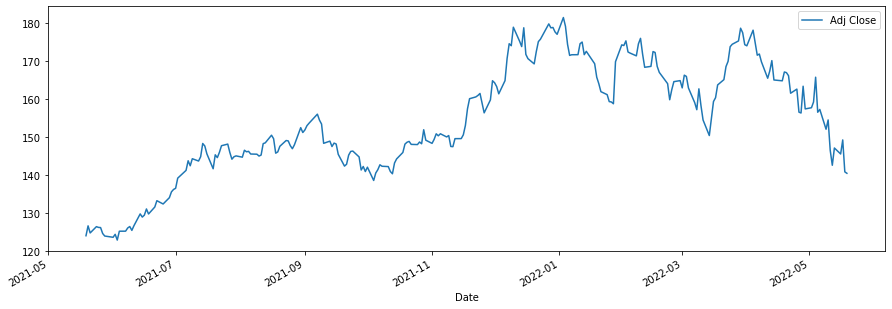

In [24]:
AAPL['Adj Close'].plot(legend=True,figsize=(15,5))

<AxesSubplot:xlabel='Date'>

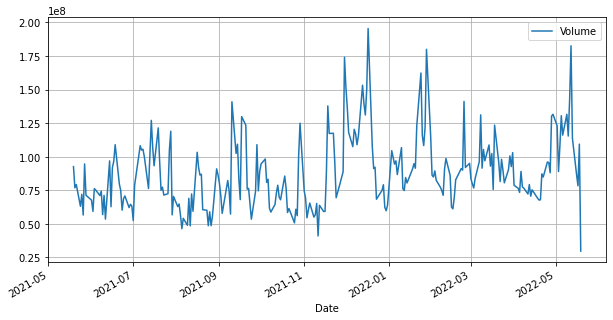

In [28]:
AAPL['Volume'].plot(legend=True,figsize=(10,5),grid=True)

moving avgs

In [37]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

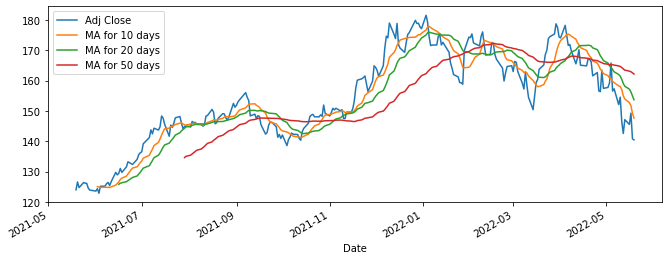

In [38]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(11,4))

<AxesSubplot:xlabel='Date'>

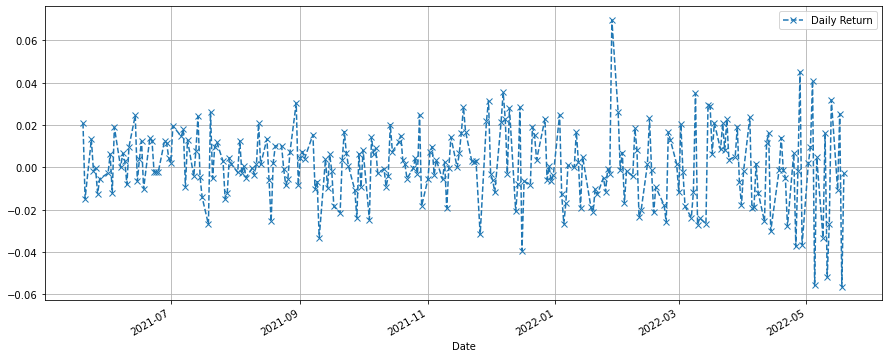

In [41]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6),legend = True,linestyle='--',marker='x',grid=True)

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

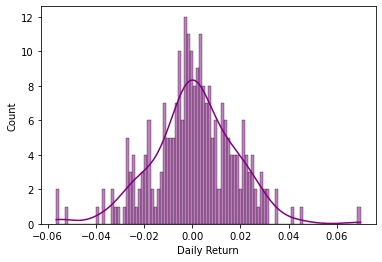

In [47]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [50]:
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [51]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-19,123.981667,2308.709961,241.150879,3231.800049
2021-05-20,126.586777,2356.090088,244.483643,3247.679932
2021-05-21,124.717461,2345.100098,243.184280,3203.080078
2021-05-24,126.377975,2406.669922,248.748825,3244.989990
2021-05-25,126.179115,2409.070068,249.681213,3259.050049


In [52]:
tech_rets = closing_df.pct_change()     #daily rertuns

In [53]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-05-19,NaN,NaN,NaN,NaN
2021-05-20,0.021012,0.020522,0.013820,0.004914
2021-05-21,-0.014767,-0.004665,-0.005315,-0.013733
2021-05-24,0.013314,0.026255,0.022882,0.013084
2021-05-25,-0.001574,0.000997,0.003748,0.004333


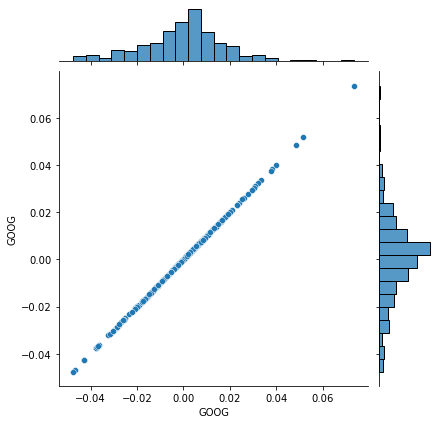

In [54]:
sns.jointplot(x='GOOG',y='GOOG',data= tech_rets,kind='scatter')

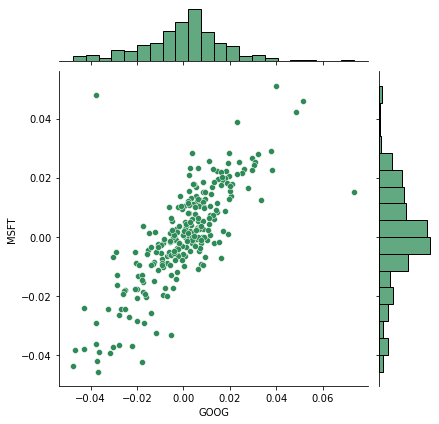

In [56]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

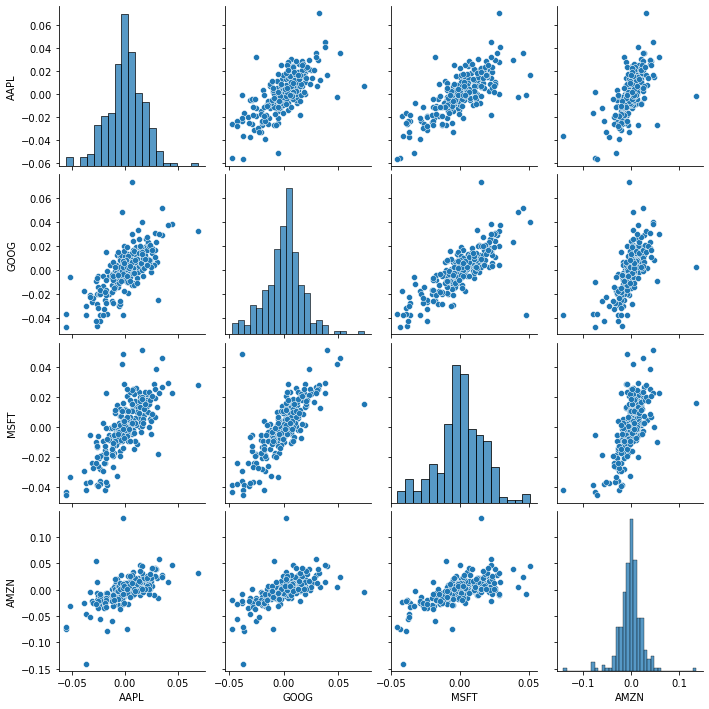

In [57]:
sns.pairplot(tech_rets.dropna())

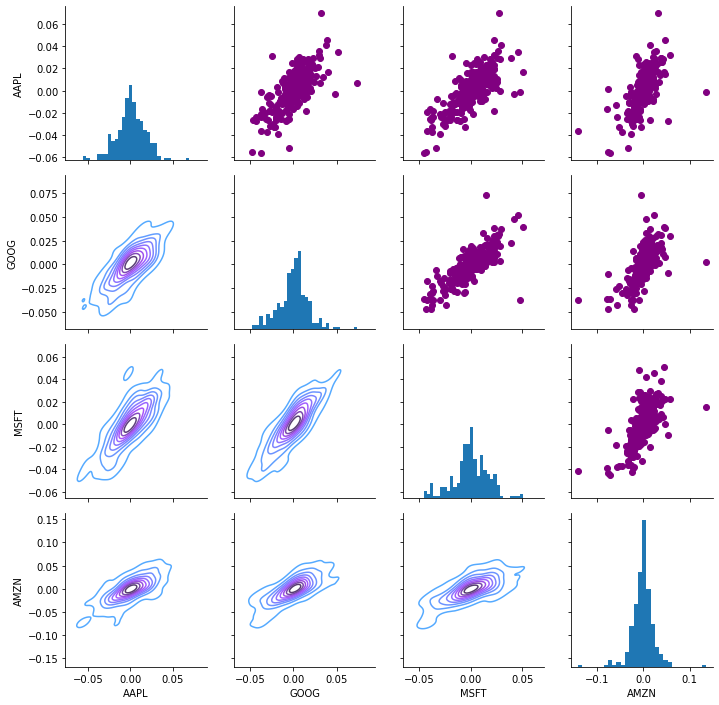

In [59]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

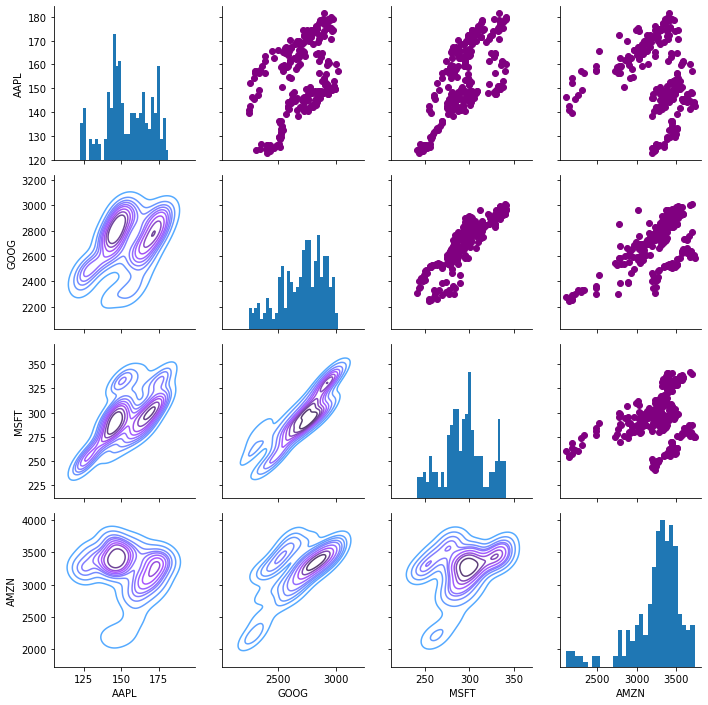

In [60]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

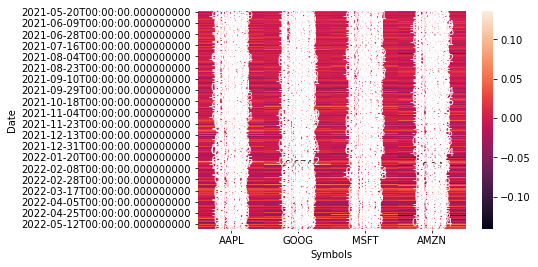

In [62]:
sns.heatmap(tech_rets.dropna(),annot=True)      #revieww needed

RISK ANALYSIS

In [63]:
rets = tech_rets.dropna()

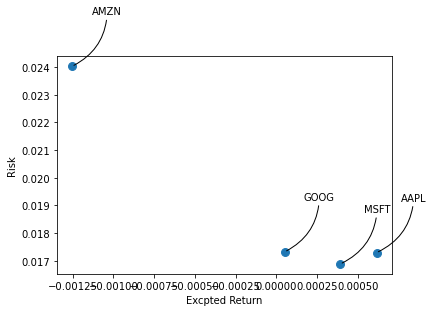

In [66]:
area= np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Excpted Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))